# practice 1. 단순 선형 회귀와 R square

다이아몬드 데이터 셋에서 독립 변수를 하나 선택하여 가격을 예측하는 선형 회귀 모델을 만들어보세요. 독립 변수를 바꿔가면서 모델을 학습시켜 보고, r square 값을 비교해보세요. 그리고 독립변수나 종속 변수에 로그를 씌워주는 등의 전처리를 한 뒤, 모델을 학습시킨 다음 결과를 비교해보세요.

In [14]:
from utils import load_diamonds_dataset

x_train, x_test, y_train, y_test = load_diamonds_dataset()

In [15]:
# 독립변수
x_train = x_train[["carat", "depth", "table", "x", "y", "z"]]

In [16]:
x_train

,carat,depth,table,x,y,z
5463,1.23,61.9,60.6,6.79,6.85,4.22
13984,1.24,61.2,57.0,7.02,6.87,4.25
9681,1.00,62.5,56.0,6.38,6.41,4.00
9473,1.03,61.1,59.0,6.56,6.50,3.99
37376,0.40,62.4,56.0,4.70,4.73,2.94
...,...,...,...,...,...,...
32399,0.38,61.6,56.0,4.68,4.71,2.89
17048,0.30,62.1,55.0,4.31,4.35,2.69
23924,2.01,62.1,56.0,8.08,8.03,5.00
34086,0.36,60.4,58.0,4.64,4.67,2.81


In [17]:
# 종속변수
y_train

5463      3835
13984     5694
9681      4649
9473      4603
37376      982
         ...  
32399      791
17048      612
23924    12048
34086      852
27439    18066
Name: price, Length: 43152, dtype: int64

## 종속 변수의 분포도 확인하기

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


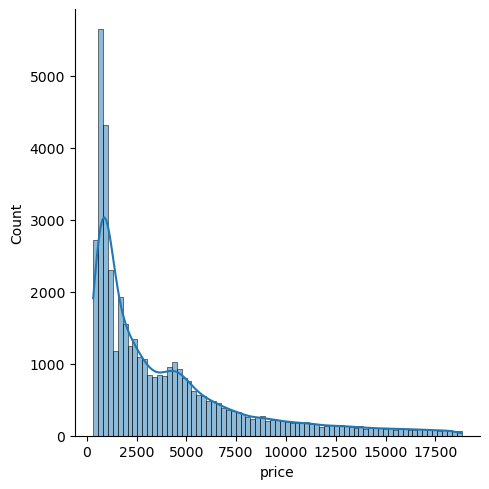

In [22]:

import seaborn as sns

sns.displot(
    y_train,
    kde = True
)

In [18]:
x_train["price"] = y_train

## 독립변수, 종속변수의 피어슨 상관관계 확인해보고  독립변수 정하기

In [19]:

x_train.corr()["price"].sort_values(ascending=True)

depth   -0.007623
table    0.126328
z        0.858006
y        0.860512
x        0.884747
carat    0.921702
price    1.000000
Name: price, dtype: float64

In [44]:
# 선형 상관관계가 가장 큰 변수들 중 carat을 선택해 선형 회귀 모델을 학습시키기. 

## 선형 회귀 모델 학습

### - 독립변수 = carat

In [30]:
x_train = x_train["carat"]
# x_test = x_test["carat"]

Text(0, 0.5, 'price')

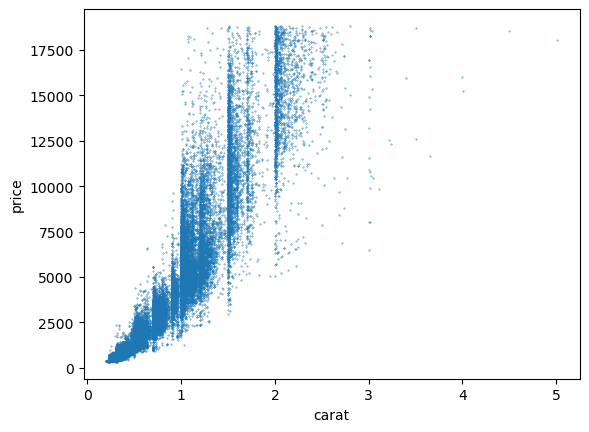

In [31]:
# 먼저 scatter plot 부터 그려보겠습니다.
from matplotlib import pyplot as plt

plt.scatter(x_train, y_train, s=0.1)
plt.xlabel("carat")
plt.ylabel("price")

In [32]:
# 양의 선형 관계를 가지고 있다는 것울 알 수 있음

In [33]:
# statsmodel로 선형 회귀 모델을 학습시키기. 
import statsmodels.api as sm

x_constant_train = sm.add_constant(x_train, has_constant="add")

In [35]:
# 최소 제곱법 OLS으로 모델 학습

model = sm.OLS(y_train, x_constant_train)
results = model.fit()

In [37]:
# carat 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 2.436e+05
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:11:06   Log-Likelihood:            -3.7804e+05
No. Observations:               43152   AIC:                         7.561e+05
Df Residuals:                   43150   BIC:                         7.561e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2249.3462     14.549   -154.602      0.000   -2277.863   -2220.829
carat       7752.9269     15.707    493.585      0.000    7722.140    7783.714
==============================================================================
Omnibus:                    11106.645   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123819.391
Skew:                           0.920   Prob(JB):                         0.00
Kurtosis:                      11.092   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
results.params

const   -2249.346203
carat    7752.926912
dtype: float64

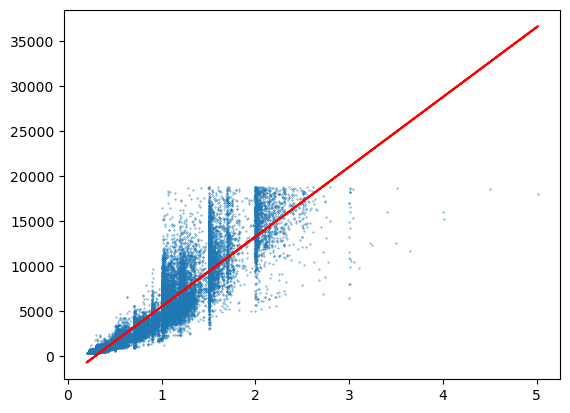

In [43]:
b, w = results.params
y_train_pred = results.predict(x_constant_train)
plt.scatter(x_train, y_train, s=0.1)
plt.plot(x_train, y_train_pred, color ="red")

### => 독립변수 carat일 때, r-square 값이 0.850

In [45]:
## 독립 변수 변경하면서 r-spuare값 비교

### - 독립변수 = X 

In [20]:
x_train = x_train["x"]

In [21]:
import statsmodels.api as sm

x_constant_train = sm.add_constant(x_train, has_constant="add")

In [22]:
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

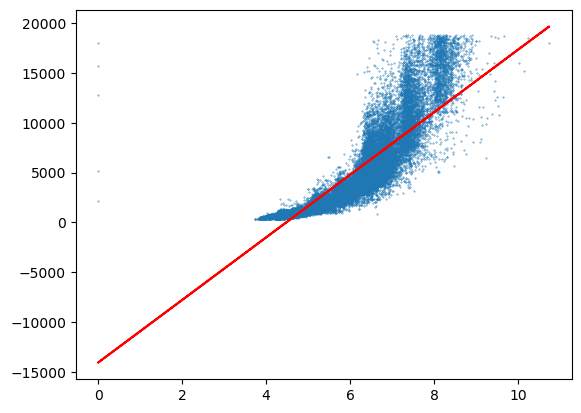

In [26]:
import matplotlib.pyplot as plt
b, w = results.params
y_train_pred = results.predict(x_constant_train)
plt.scatter(x_train, y_train, s=0.1)
plt.plot(x_train, y_train_pred, color ="red")

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 1.555e+05
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:39:00   Log-Likelihood:            -3.8597e+05
No. Observations:               43152   AIC:                         7.719e+05
Df Residuals:                   43150   BIC:                         7.720e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.407e+04     46.495   -302.576      0.000   -1.42e+04    -1.4e+04
x           3141.4981      7.967    394.328      0.000    3125.883    3157.113
==============================================================================
Omnibus:                    15435.108   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128917.243
Skew:                           1.491   Prob(JB):                         0.00
Kurtosis:                      10.925   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### => 독립변수 x일 때, r-square 값이 0.783

## 연속형 변수 전처리 (로그)

Text(0.5, 1.0, '< z >')

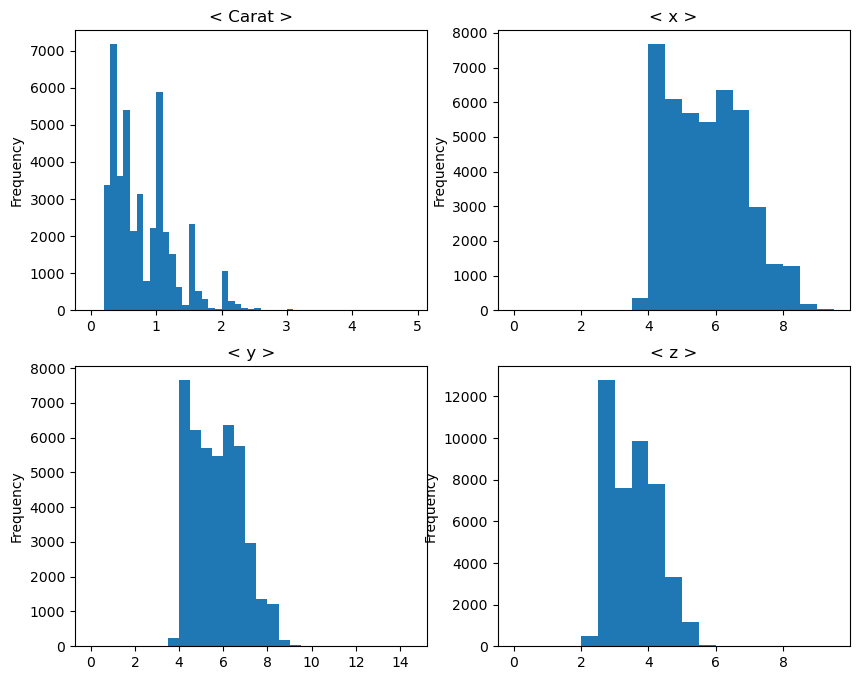

In [92]:
import numpy as np

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
x_train["carat"].plot(kind="hist", bins=np.arange(0, 5, 0.1))
plt.title('< Carat >')

plt.subplot(2, 2, 2)
x_train["x"].plot(kind="hist", bins=np.arange(0, 10, 0.5))
plt.title('< x >')

plt.subplot(2, 2, 3)
x_train["y"].plot(kind="hist", bins=np.arange(0, 15, 0.5))
plt.title('< y >')

plt.subplot(2, 2, 4)
x_train["z"].plot(kind="hist", bins=np.arange(0, 10, 0.5))
plt.title('< z >')

In [87]:
# carat을 종모양 분포로 만들어주기 위해 1을 더해주고 로그 취해주겠음 

In [142]:
x_train["carat"] = np.log1p(x_train["carat"])

<Axes: ylabel='Frequency'>

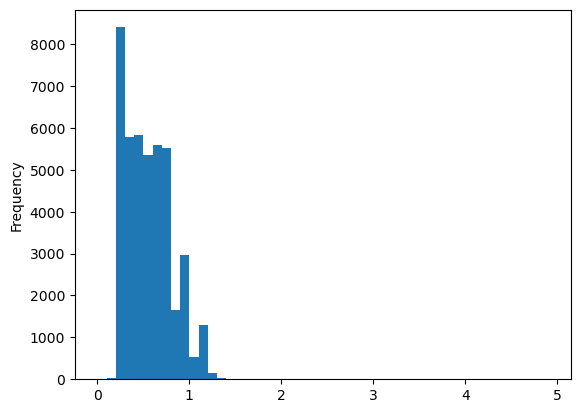

In [99]:
x_train["carat"].plot(kind="hist", bins=np.arange(0, 5, 0.1))

### - carat 로그 씌워준 후 선형 회귀식 뽑고 r-square 구해보기

In [123]:
x_train = x_train["carat"]

In [124]:
import statsmodels.api as sm

x_constant_train = sm.add_constant(x_train, has_constant="add")
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

In [102]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 1.889e+05
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:57:37   Log-Likelihood:            -3.8262e+05
No. Observations:               43152   AIC:                         7.652e+05
Df Residuals:                   43150   BIC:                         7.653e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4212.5150     20.466   -205.832      0.000   -4252.628   -4172.402
carat       1.467e+04     33.768    434.582      0.000    1.46e+04    1.47e+04
==============================================================================
Omnibus:                     9756.313   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34093.204
Skew:                           1.121   Prob(JB):                         0.00
Kurtosis:                       6.733   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### => 독립변수 carat일 때, r-square 값이 0.814   (전처리 후 회귀식이 설명 가능한 데이터 범위가 줄어들었음)

### - 종속 변수 price 로그 씌워준 후 carat과의 선형 회귀식 뽑고 r-square 구해보기

<Axes: ylabel='Frequency'>

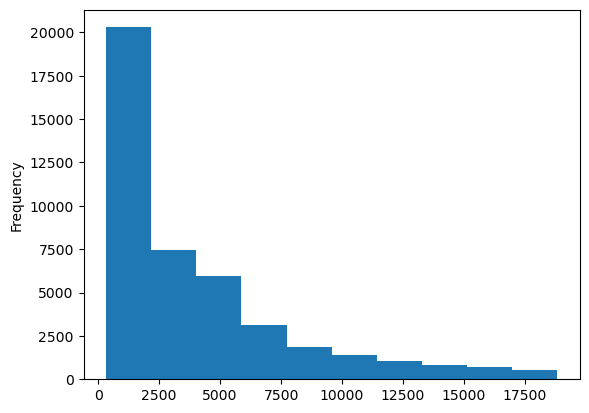

In [134]:
y_train.plot(kind="hist", )

In [143]:
y_train = np.log1p(y_train)

<Axes: ylabel='Frequency'>

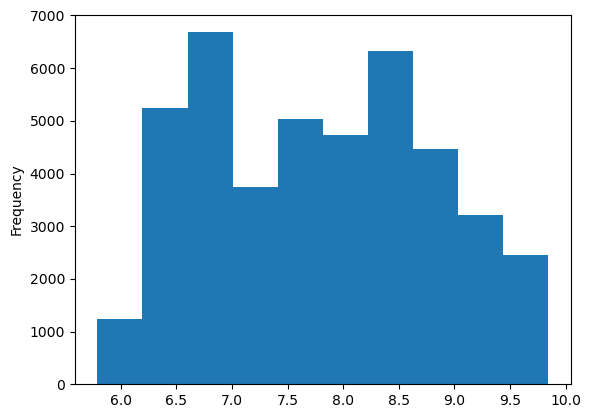

In [136]:
y_train.plot(kind="hist", )

In [137]:
import statsmodels.api as sm

x_train = x_train["carat"]
x_constant_train = sm.add_constant(x_train, has_constant="add")
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 2.391e+05
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:06:19   Log-Likelihood:                -21338.
No. Observations:               43152   AIC:                         4.268e+04
Df Residuals:                   43150   BIC:                         4.270e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2131      0.004   1661.355      0.000       6.206       6.220
carat          1.9741      0.004    488.945      0.000       1.966       1.982
==============================================================================
Omnibus:                     8945.421   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61325.810
Skew:                          -0.826   Prob(JB):                         0.00
Kurtosis:                       8.602   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### => 종속변수 로그 취해주고 독립변수 carat일 때, r-square 값이 0.847 ( 감소 )

### - 종속&독립 price, carat 둘다 로그 씌워준 후 선형 회귀식 뽑고 r-square 구해보기

In [144]:
import statsmodels.api as sm

x_train = x_train["carat"]
x_constant_train = sm.add_constant(x_train, has_constant="add")
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 4.332e+05
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:08:56   Log-Likelihood:                -10042.
No. Observations:               43152   AIC:                         2.009e+04
Df Residuals:                   43150   BIC:                         2.010e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5920      0.004   1535.471      0.000       5.585       5.599
carat          3.9552      0.006    658.208      0.000       3.943       3.967
==============================================================================
Omnibus:                     2355.331   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6775.906
Skew:                          -0.272   Prob(JB):                         0.00
Kurtosis:                       4.864   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### => 종속,독립변수 price, carat 로그 씌워줬을 때, r-square 값이 0.909 ( 증가 )

## 풀이 & 해석